In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('EDA용.csv')
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,월평균소득금액,평균면적(m^2),면적당 가격(만원/m^2),"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립
0,종로구,사직동,23,1,2,5,2,6,1,954,...,5039456,135,1231,1,462,2476,25,0,2,2
1,종로구,부암동,2,0,0,6,0,0,1,150,...,3661725,74,628,3,381,2586,20,0,2,2
2,종로구,평창동,6,0,0,6,1,3,6,175,...,4544046,120,780,3,996,4740,66,0,1,1
3,용산구,한남동,21,0,0,2,1,1,10,364,...,4397761,129,1995,5,1027,6364,114,1,0,1
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,3487691,61,1273,0,1053,5333,104,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   자치구                    420 non-null    object 
 1   행정동                    420 non-null    object 
 2   유해업소수                  420 non-null    int64  
 3   대형쇼핑몰수                 420 non-null    int64  
 4   도서관수                   420 non-null    int64  
 5   미술관 박물관 극장수            420 non-null    int64  
 6   의료시설수(병원,의원,보건소,보건지소)  420 non-null    int64  
 7   공원 수                   420 non-null    int64  
 8   경로당 수                  420 non-null    int64  
 9   보육시설정원                 420 non-null    int64  
 10  보육시설현원                 420 non-null    int64  
 11  보육시설포화도                420 non-null    float64
 12  횡단보도수                  420 non-null    int64  
 13  육교수                    420 non-null    int64  
 14  CCTV수                  420 non-null    int64  
 15  월평균소득금

### 1인가구 비율 추가

In [4]:
df_one = pd.read_csv('data/raw_data/가중치선정/가구원수별+가구-+읍면동.csv')
df_one

,동별(1),동별(2),동별(3),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8
0,동별(1),동별(2),동별(3),계 (가구),1인가구 (가구),2인가구 (가구),3인가구 (가구),4인가구 (가구),5인가구 (가구),6인가구 (가구),7인이상가구 (가구),평균 가구원수 (명)
1,합계,소계,소계,3982290,1390701,1033901,792690,602791,130122,25770,6315,2.3
2,합계,종로구,소계,63414,25983,16281,10882,7679,2027,440,122,2.1
3,합계,종로구,사직동,3839,1487,1073,701,432,112,28,6,-
4,합계,종로구,삼청동,1031,380,295,189,112,39,11,5,-
...,...,...,...,...,...,...,...,...,...,...,...,...
447,합계,강동구,둔촌1동,13,6,X,X,X,X,X,X,-
448,합계,강동구,둔촌2동,9940,2389,2763,2407,1924,380,61,16,-
449,합계,강동구,암사1동,14431,4551,4008,3064,2229,464,89,26,-
450,합계,강동구,천호2동,15701,6378,4433,2689,1710,380,84,27,-


In [5]:
df_one.columns = ['동별(1)', '동별(2)', '동별(3)', '계 (가구)', '1인가구 (가구)', '2인가구 (가구)',
        '3인가구 (가구)', '4인가구 (가구)', '5인가구 (가구)', '6인가구 (가구)',
        '7인이상가구 (가구)', '평균 가구원수 (명)']

In [6]:
df_one.head()

,동별(1),동별(2),동별(3),계 (가구),1인가구 (가구),2인가구 (가구),3인가구 (가구),4인가구 (가구),5인가구 (가구),6인가구 (가구),7인이상가구 (가구),평균 가구원수 (명)
0,동별(1),동별(2),동별(3),계 (가구),1인가구 (가구),2인가구 (가구),3인가구 (가구),4인가구 (가구),5인가구 (가구),6인가구 (가구),7인이상가구 (가구),평균 가구원수 (명)
1,합계,소계,소계,3982290,1390701,1033901,792690,602791,130122,25770,6315,2.3
2,합계,종로구,소계,63414,25983,16281,10882,7679,2027,440,122,2.1
3,합계,종로구,사직동,3839,1487,1073,701,432,112,28,6,-
4,합계,종로구,삼청동,1031,380,295,189,112,39,11,5,-


In [7]:
df_one = df_one.iloc[2:, 1:5]
df_one.head()

,동별(2),동별(3),계 (가구),1인가구 (가구)
2,종로구,소계,63414,25983
3,종로구,사직동,3839,1487
4,종로구,삼청동,1031,380
5,종로구,부암동,3773,1129
6,종로구,평창동,6265,1302


In [8]:
df_one.columns = ['자치구', '행정동', '총가구', '1인가구']
df_one.head()

,자치구,행정동,총가구,1인가구
2,종로구,소계,63414,25983
3,종로구,사직동,3839,1487
4,종로구,삼청동,1031,380
5,종로구,부암동,3773,1129
6,종로구,평창동,6265,1302


In [9]:
df_one['1인가구'] = df_one['1인가구'].astype('int')
df_one['총가구'] = df_one['총가구'].astype('int')

In [10]:
df_one['1인가구 비율(%)'] = round((df_one['1인가구'] / df_one['총가구']) * 100, 2)
df_one 

,자치구,행정동,총가구,1인가구,1인가구 비율(%)
2,종로구,소계,63414,25983,40.97
3,종로구,사직동,3839,1487,38.73
4,종로구,삼청동,1031,380,36.86
5,종로구,부암동,3773,1129,29.92
6,종로구,평창동,6265,1302,20.78
...,...,...,...,...,...
447,강동구,둔촌1동,13,6,46.15
448,강동구,둔촌2동,9940,2389,24.03
449,강동구,암사1동,14431,4551,31.54
450,강동구,천호2동,15701,6378,40.62


In [11]:
df_one['행정동'] = df_one['행정동'].str.replace('.', '·')

C:\Users\yju12\AppData\Local\Temp\ipykernel_22988\1516381321.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_one['행정동'] = df_one['행정동'].str.replace('.', '·')


In [12]:
df_one

,자치구,행정동,총가구,1인가구,1인가구 비율(%)
2,종로구,소계,63414,25983,40.97
3,종로구,사직동,3839,1487,38.73
4,종로구,삼청동,1031,380,36.86
5,종로구,부암동,3773,1129,29.92
6,종로구,평창동,6265,1302,20.78
...,...,...,...,...,...
447,강동구,둔촌1동,13,6,46.15
448,강동구,둔촌2동,9940,2389,24.03
449,강동구,암사1동,14431,4551,31.54
450,강동구,천호2동,15701,6378,40.62


- 데이터 합치기

In [13]:
df = pd.merge(df, df_one[['행정동', '1인가구 비율(%)']], on='행정동', how='left')
df

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,평균면적(m^2),면적당 가격(만원/m^2),"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%)
0,종로구,사직동,23,1,2,5,2,6,1,954,...,135,1231,1,462,2476,25,0,2,2,38.73
1,종로구,부암동,2,0,0,6,0,0,1,150,...,74,628,3,381,2586,20,0,2,2,29.92
2,종로구,평창동,6,0,0,6,1,3,6,175,...,120,780,3,996,4740,66,0,1,1,20.78
3,용산구,한남동,21,0,0,2,1,1,10,364,...,129,1995,5,1027,6364,114,1,0,1,44.03
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,61,1273,0,1053,5333,104,1,1,2,32.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,0,1,1,2,1,2,323,...,59,1895,0,741,2650,49,0,0,0,29.69
416,종로구,종로1·2·3·4가동,289,11,0,13,0,4,18,741,...,75,958,5,170,1751,12,0,1,1,65.21
417,서초구,방배2동,1,0,0,0,1,6,5,694,...,104,1594,3,934,6287,99,0,0,0,28.31
418,강북구,미아동,7,1,1,1,3,5,7,347,...,71,695,1,565,6640,48,0,0,0,45.69


In [14]:
df[df['1인가구 비율(%)'].isna()]

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,평균면적(m^2),면적당 가격(만원/m^2),"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%)
376,강남구,개포3동,0,2,1,0,0,5,4,444,...,90,2513,5,1018,4227,98,0,2,2,NaN
413,강동구,상일1동,1,0,1,0,1,6,8,856,...,72,1594,3,4517,2651,244,2,3,5,NaN
414,강동구,상일2동,0,0,0,0,1,1,1,668,...,84,1206,0,1002,2651,55,0,1,1,NaN


In [15]:
# 개포 3동은 바로 옆 개포2동의 값으로 대체
df_one[df_one['행정동'].str.contains('개포')]

,자치구,행정동,총가구,1인가구,1인가구 비율(%)
394,강남구,개포1동,2328,550,23.63
395,강남구,개포4동,7798,2280,29.24
404,강남구,개포2동,7427,1058,14.25


In [16]:
# 상일1동, 상일2동은 상일동 값으로 대체
df_one[df_one['행정동'].str.contains('상일')]

,자치구,행정동,총가구,1인가구,1인가구 비율(%)
435,강동구,상일동,10984,1441,13.12


In [17]:
df.loc[df['행정동'] == '상일1동', '1인가구 비율(%)'] = 13.12
df.loc[df['행정동'] == '상일2동', '1인가구 비율(%)'] = 13.12
df.loc[df['행정동'] == '개포3동', '1인가구 비율(%)'] = 14.25

## 어린이집 데이터 추가

### 국공립 어린이집 정원

In [18]:
data = pd.read_csv('data/raw_data/가중치선정/보육시설+이용(동별)(2012년+이후)_20240411094627.csv')
data.head()

,동별(1),동별(2),동별(3),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12,2022.13,2022.14,2022.15
0,동별(1),동별(2),동별(3),보육시설 정원,보육시설 정원,보육시설 정원,보육시설 정원,보육시설 정원,보육시설 정원,보육시설 정원,보육시설 정원,보육시설 현원,보육시설 현원,보육시설 현원,보육시설 현원,보육시설 현원,보육시설 현원,보육시설 현원,보육시설 현원
1,동별(1),동별(2),동별(3),소계,국공립,사회복지법인,법인·단체 등,민간,가정,부모협동,직장,소계,국공립,사회복지법인,법인·단체 등,민간,가정,부모협동,직장
2,합계,소계,소계,223628,103678,1533,4954,65662,25770,805,21226,167427,81969,991,3404,47079,21258,597,12129
3,합계,종로구,소계,4409,1993,100,49,193,39,-,2035,2642,1385,47,23,139,35,-,1013
4,합계,종로구,사직동,954,101,-,-,41,-,-,812,542,67,-,-,33,-,-,442


In [19]:
data.iloc[1:2].values

array([['동별(1)', '동별(2)', '동별(3)', '소계', '국공립', '사회복지법인', '법인·단체 등',
        '민간', '가정', '부모협동', '직장', '소계', '국공립', '사회복지법인', '법인·단체 등', '민간',
        '가정', '부모협동', '직장']], dtype=object)

In [20]:
data.columns = ['동별(1)', '동별(2)', '동별(3)', '소계', '국공립', '사회복지법인', '법인·단체 등',
        '민간', '가정', '부모협동', '직장', '소계', '국공립', '사회복지법인', '법인·단체 등', '민간',
        '가정', '부모협동', '직장']

In [21]:
data = data.iloc[3:, 1:11]
data = data[['동별(3)', '국공립']]
data

,동별(3),국공립
3,소계,1993
4,사직동,101
5,삼청동,32
6,부암동,127
7,평창동,123
...,...,...
449,천호2동,428
450,길동,273
451,강일동,679
452,상일1동,664


In [22]:
data.replace('-', 0, inplace=True)

In [23]:
data['국공립'] = data['국공립'].astype('int')

In [24]:
data.columns

Index(['동별(3)', '국공립'], dtype='object')

In [25]:
data.columns = ['행정동', '공립보육시설정원']
data

,행정동,공립보육시설정원
3,소계,1993
4,사직동,101
5,삼청동,32
6,부암동,127
7,평창동,123
...,...,...
449,천호2동,428
450,길동,273
451,강일동,679
452,상일1동,664


In [26]:
data['행정동'] = data['행정동'].str.replace('.', '·')

C:\Users\yju12\AppData\Local\Temp\ipykernel_22988\584127754.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['행정동'] = data['행정동'].str.replace('.', '·')


In [27]:
df = pd.merge(df, data, on='행정동', how = 'left')
df

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,면적당 가격(만원/m^2),"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원
0,종로구,사직동,23,1,2,5,2,6,1,954,...,1231,1,462,2476,25,0,2,2,38.73,101
1,종로구,부암동,2,0,0,6,0,0,1,150,...,628,3,381,2586,20,0,2,2,29.92,127
2,종로구,평창동,6,0,0,6,1,3,6,175,...,780,3,996,4740,66,0,1,1,20.78,123
3,용산구,한남동,21,0,0,2,1,1,10,364,...,1995,5,1027,6364,114,1,0,1,44.03,145
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,1273,0,1053,5333,104,1,1,2,32.85,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,0,1,1,2,1,2,323,...,1895,0,741,2650,49,0,0,0,29.69,245
416,종로구,종로1·2·3·4가동,289,11,0,13,0,4,18,741,...,958,5,170,1751,12,0,1,1,65.21,97
417,서초구,방배2동,1,0,0,0,1,6,5,694,...,1594,3,934,6287,99,0,0,0,28.31,298
418,강북구,미아동,7,1,1,1,3,5,7,347,...,695,1,565,6640,48,0,0,0,45.69,198


### 공립, 민간 어린이집 수

In [28]:
data_knd = pd.read_csv('data/raw_data/가중치선정/서울시 어린이집 정보(표준 데이터, 행정동).csv')
data_knd.head()

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일,ADM_NM
0,종로구,11110000180,로카키즈어린이집,직장,정상,3184,서울특별시 종로구 새문안로2길 10 1층,02-739-8042,NaN,NaN,...,0.0,거짓,0.0,0.0,0.0,1.0,0.0,6.0,2022/10/26 22:01:35,사직동
1,종로구,11110000166,푸르지오어린이집,직장,폐지,3182,서울특별시 종로구 신문로1가 새문안로 75,02-2288-2761,02-2288-2761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/10/26 22:01:35,사직동
2,종로구,11110000162,아이누리 어린이집,직장,정상,3174,서울특별시 종로구 사직로8길 20 파크팰리스 제1층 제101호,02-6959-7695,02-6959-7696,NaN,...,0.0,거짓,0.0,0.0,0.0,2.0,0.0,13.0,2022/10/26 22:01:35,사직동
3,종로구,11110000158,현대해상 온마음어린이집,직장,정상,3176,서울특별시 종로구 신문로2가 경희궁1길 9,02-725-5355,02-725-5356,NaN,...,0.0,거짓,0.0,0.0,0.0,2.0,0.0,16.0,2022/10/26 22:01:35,사직동
4,종로구,11110000157,LG광화문어린이집,직장,정상,3184,서울특별시 종로구 신문로2가 새문안로 58,070-4065-0286,070-4065-0287,NaN,...,0.0,거짓,0.0,0.0,0.0,1.0,0.0,11.0,2022/10/26 22:01:35,사직동


In [29]:
data_knd.columns

Index(['시군구명', '어린이집코드', '어린이집명', '어린이집유형', '운영현황', '우편번호', '상세주소', '전화번호',
       '팩스번호', '홈페이지주소', '보육실수', '보육실 면적', '놀이터수', 'CCTV총설치수', '보육교직원수', '정원',
       '현원', '시설 위도(좌표값)', '시설 경도(좌표값)', '통학차량운영여부', '인가일자', '휴지시작일자',
       '휴지종료일자', '폐지일자', '데이터기준일자', '제공서비스', '반수-만0세', '반수-만1세', '반수-만2세',
       '반수-만3세', '반수-만4세', '반수-만5세', '반수-영아혼합(만0~2세)', '반수-유아혼합(만3~5세)',
       '반수-특수장애', '반수-총계', '아동수-만0세', '아동수-만1세', '아동수-만2세', '아동수-만3세',
       '아동수-만4세', '아동수-만5세', '아동수-영아혼합(만0~2세)', '아동수-유아혼합(만3~5세)', '아동수-특수장애',
       '아동수-총계', '근속년수-1년미만', '근속년수-1년이상~2년미만', '근속년수-2년이상~4년미만',
       '근속년수-4년이상~6년미만', '근속년수-6년이상', '교직원현황-원장', '교직원현황-보육교사', '교직원현황-특수교사',
       '교직원현황-치료교사', '교직원현황-영양사', '교직원현황-간호사', '교직원현황-간호조무사', '교직원현황-조리원',
       '교직원현황-사무직원', '교직원현황-총계', '데이터수집일', 'ADM_NM'],
      dtype='object')

In [30]:
data_knd['시설 경도(좌표값)'].isna().sum()

0

In [31]:
data_knd = data_knd[['시군구명', 'ADM_NM', '어린이집유형', '운영현황', '상세주소']]
data_knd.head()

,시군구명,ADM_NM,어린이집유형,운영현황,상세주소
0,종로구,사직동,직장,정상,서울특별시 종로구 새문안로2길 10 1층
1,종로구,사직동,직장,폐지,서울특별시 종로구 신문로1가 새문안로 75
2,종로구,사직동,직장,정상,서울특별시 종로구 사직로8길 20 파크팰리스 제1층 제101호
3,종로구,사직동,직장,정상,서울특별시 종로구 신문로2가 경희궁1길 9
4,종로구,사직동,직장,정상,서울특별시 종로구 신문로2가 새문안로 58


In [32]:
data_knd['어린이집유형'].unique()

array(['직장', '민간', '국공립', '사회복지법인', '가정', '법인?단체등', '협동'], dtype=object)

In [33]:
data_knd['운영현황'].unique()

array(['정상', '폐지', '휴지', '재개', nan], dtype=object)

In [34]:
data_knd = data_knd[data_knd['운영현황'] != '폐지']
data_knd = data_knd[data_knd['운영현황'] != '휴지']
data_knd = data_knd[data_knd['운영현황'].notna()]
data_knd

,시군구명,ADM_NM,어린이집유형,운영현황,상세주소
0,종로구,사직동,직장,정상,서울특별시 종로구 새문안로2길 10 1층
2,종로구,사직동,직장,정상,서울특별시 종로구 사직로8길 20 파크팰리스 제1층 제101호
3,종로구,사직동,직장,정상,서울특별시 종로구 신문로2가 경희궁1길 9
4,종로구,사직동,직장,정상,서울특별시 종로구 신문로2가 새문안로 58
5,종로구,사직동,직장,정상,서울특별시 종로구 신문로2가 경희궁길 26 썬타워빌딩 1층
...,...,...,...,...,...
9201,동대문구,NaN,국공립,정상,서울특별시 동대문구 전농로16길 97 숲속도서관 1층
9203,동대문구,NaN,국공립,정상,서울특별시 동대문구 답십리로66길 3
9204,동대문구,NaN,국공립,정상,서울특별시 동대문구 무학로 89 2층
9205,동대문구,NaN,국공립,정상,서울특별시 동대문구 한천로28길 9 202동1호


In [35]:
data_knd = data_knd[data_knd['어린이집유형'] == '국공립']
data_knd

,시군구명,ADM_NM,어린이집유형,운영현황,상세주소
10,종로구,사직동,국공립,정상,서울특별시 종로구 필운대로1길 16-8
11,종로구,삼청동,국공립,정상,서울특별시 종로구 삼청로7길 26 (팔판동)
14,종로구,부암동,국공립,정상,서울특별시 종로구 자하문로43길 4-13
15,종로구,부암동,국공립,정상,서울특별시 종로구 세검정로6다길 10-7
16,종로구,평창동,국공립,정상,서울특별시 종로구 평창문화로 73-7 종로생명숲어린이집
...,...,...,...,...,...
9201,동대문구,NaN,국공립,정상,서울특별시 동대문구 전농로16길 97 숲속도서관 1층
9203,동대문구,NaN,국공립,정상,서울특별시 동대문구 답십리로66길 3
9204,동대문구,NaN,국공립,정상,서울특별시 동대문구 무학로 89 2층
9205,동대문구,NaN,국공립,정상,서울특별시 동대문구 한천로28길 9 202동1호


In [137]:
data_knd[data_knd['ADM_NM'].isna()]

,시군구명,ADM_NM,어린이집유형,운영현황,상세주소
8624,은평구,NaN,국공립,정상,서울특별시 은평구 응암로16길 20-9 구립 내일어린이집
8626,광진구,NaN,국공립,정상,서울특별시 광진구 동일로56가길 31 3층
8627,중랑구,NaN,국공립,정상,서울특별시 중랑구 용마산로 209
8628,양천구,NaN,국공립,정상,서울특별시 양천구 목동중앙북로2길 8 3층
8629,중랑구,NaN,국공립,정상,서울특별시 중랑구 용마산로 461
...,...,...,...,...,...
9201,동대문구,NaN,국공립,정상,서울특별시 동대문구 전농로16길 97 숲속도서관 1층
9203,동대문구,NaN,국공립,정상,서울특별시 동대문구 답십리로66길 3
9204,동대문구,NaN,국공립,정상,서울특별시 동대문구 무학로 89 2층
9205,동대문구,NaN,국공립,정상,서울특별시 동대문구 한천로28길 9 202동1호


In [138]:
# QGIS로 채운 행정동 불러오기
fillna = pd.read_csv('전처리/nafilldata.csv')
fillna

,lat,lng,ADM_NM,주소
0,127.076876,37.497633,개포3동,서울특별시 강남구 대치2동 삼성로72길7 961-17
1,127.039025,37.488238,도곡1동,서울특별시 강남구 도곡로18길 57 1층
2,127.106932,37.469063,세곡동,서울특별시 강남구 밤고개로 286 1층
3,127.055525,37.511795,삼성1동,서울특별시 강남구 봉은사로82길 23 3층
4,127.059768,37.502645,대치2동,서울특별시 강남구 삼성로72길 7 3층
...,...,...,...,...
96,127.110378,37.617722,신내1동,서울특별시 중랑구 신내역로1길 142
97,127.085681,37.572388,면목4동,서울특별시 중랑구 용마산로 209
98,127.098168,37.592371,망우3동,서울특별시 중랑구 용마산로 461
99,127.074879,37.594999,중화2동,서울특별시 중랑구 중랑역로3길 28


In [139]:
na_dong = fillna['ADM_NM'].to_list()

In [140]:
data_kndna = data_knd[data_knd['ADM_NM'].isna()].sort_values(by = '상세주소')
data_kndna['ADM_NM'] = na_dong
data_kndna

,시군구명,ADM_NM,어린이집유형,운영현황,상세주소
8798,강남구,개포3동,국공립,정상,서울특별시 강남구 대치2동 삼성로72길7 961-17
8794,강남구,도곡1동,국공립,정상,서울특별시 강남구 도곡로18길 57 1층
8797,강남구,세곡동,국공립,정상,서울특별시 강남구 밤고개로 286 1층
8796,강남구,삼성1동,국공립,정상,서울특별시 강남구 봉은사로82길 23 3층
8795,강남구,대치2동,국공립,정상,서울특별시 강남구 삼성로72길 7 3층
...,...,...,...,...,...
8650,중랑구,신내1동,국공립,정상,서울특별시 중랑구 신내역로1길 142
8627,중랑구,면목4동,국공립,정상,서울특별시 중랑구 용마산로 209
8629,중랑구,망우3동,국공립,정상,서울특별시 중랑구 용마산로 461
8640,중랑구,중화2동,국공립,정상,서울특별시 중랑구 중랑역로3길 28


In [141]:
# 행정동 결측값을 채워 기존 데이터프레임과 결합 
data_knd = pd.concat([data_knd[data_knd['ADM_NM'].notna()], data_kndna])
data_knd

,시군구명,ADM_NM,어린이집유형,운영현황,상세주소
10,종로구,사직동,국공립,정상,서울특별시 종로구 필운대로1길 16-8
11,종로구,삼청동,국공립,정상,서울특별시 종로구 삼청로7길 26 (팔판동)
14,종로구,부암동,국공립,정상,서울특별시 종로구 자하문로43길 4-13
15,종로구,부암동,국공립,정상,서울특별시 종로구 세검정로6다길 10-7
16,종로구,평창동,국공립,정상,서울특별시 종로구 평창문화로 73-7 종로생명숲어린이집
...,...,...,...,...,...
8650,중랑구,신내1동,국공립,정상,서울특별시 중랑구 신내역로1길 142
8627,중랑구,면목4동,국공립,정상,서울특별시 중랑구 용마산로 209
8629,중랑구,망우3동,국공립,정상,서울특별시 중랑구 용마산로 461
8640,중랑구,중화2동,국공립,정상,서울특별시 중랑구 중랑역로3길 28


In [142]:
# 행정동별 공립보육시설 수 추출 
data_knd = data_knd.groupby('ADM_NM').size().to_frame().reset_index()
data_knd.columns = ['행정동', '공립보육시설수']
data_knd

,행정동,공립보육시설수
0,가락1동,9
1,가락2동,2
2,가락본동,6
3,가리봉동,2
4,가산동,3
...,...,...
409,효창동,3
410,후암동,2
411,휘경1동,3
412,휘경2동,3


In [143]:
df = pd.merge(df, data_knd, on = '행정동', how = 'left')
df
# 일부 누락된 값으로 인해 공립보육시설 정원과 수가 맞지않는 경우가 있음

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수
0,종로구,사직동,23,1,2,5,2,6,1,954,...,1,462,2476,25,0,2,2,38.73,101,1.0
1,종로구,부암동,2,0,0,6,0,0,1,150,...,3,381,2586,20,0,2,2,29.92,127,2.0
2,종로구,평창동,6,0,0,6,1,3,6,175,...,3,996,4740,66,0,1,1,20.78,123,1.0
3,용산구,한남동,21,0,0,2,1,1,10,364,...,5,1027,6364,114,1,0,1,44.03,145,2.0
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,0,1053,5333,104,1,1,2,32.85,336,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,0,1,1,2,1,2,323,...,0,741,2650,49,0,0,0,29.69,245,4.0
416,종로구,종로1·2·3·4가동,289,11,0,13,0,4,18,741,...,5,170,1751,12,0,1,1,65.21,97,2.0
417,서초구,방배2동,1,0,0,0,1,6,5,694,...,3,934,6287,99,0,0,0,28.31,298,5.0
418,강북구,미아동,7,1,1,1,3,5,7,347,...,1,565,6640,48,0,0,0,45.69,198,3.0


In [144]:
df[df['공립보육시설정원'].isna()]

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수


In [145]:
df[df['공립보육시설수'].isna()]

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,"주유소,가스충전소 수",0~9세,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수
17,용산구,이태원1동,25,1,0,0,1,1,6,230,...,0,205,2070,22,0,0,0,47.63,0,NaN
51,중구,을지로동,92,1,0,1,1,1,1,119,...,1,138,459,12,0,1,1,70.11,0,NaN
99,동작구,노량진2동,11,0,2,0,1,0,2,35,...,2,198,4239,16,0,1,1,50.34,0,NaN
122,송파구,오륜동,0,1,1,3,0,0,2,93,...,0,1085,4371,36,1,2,3,6.57,0,NaN
182,송파구,잠실6동,52,8,1,2,3,2,3,527,...,1,1237,4476,82,0,1,1,10.59,39,NaN
191,송파구,잠실7동,23,1,0,0,0,1,2,0,...,2,534,2447,36,1,1,2,9.57,0,NaN
209,성북구,돈암1동,2,1,0,0,0,2,8,241,...,1,666,4119,75,0,2,2,23.85,0,NaN
370,강남구,개포1동,0,0,0,0,0,1,11,141,...,0,848,1719,24,1,0,1,23.63,0,NaN
390,송파구,방이1동,4,0,0,0,1,4,3,201,...,0,885,4758,57,1,1,2,24.01,0,NaN


1. 공립보육시설은 있지만 정원이 na값인 경우 -> drop
2. 공립보육시설이 na이고, 정원이 0인경우 -> na값 0 으로 fill
3. 정원은 있지만, 시설수가 0인경우 -> drop

In [146]:
df = df[df['행정동'] != '잠실7동'] # 정원은 있지만 시설수가 0인 잠실7동 제거
df['공립보육시설수'].fillna(0, inplace=True) # 공립보육시설수 na값 0으로 채우기
df.dropna(inplace=True) # 정원수 na인 행 제거

C:\Users\yju12\AppData\Local\Temp\ipykernel_36628\2900269767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['공립보육시설수'].fillna(0, inplace=True) # 공립보육시설수 na값 0으로 채우기
C:\Users\yju12\AppData\Local\Temp\ipykernel_36628\2900269767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True) # 정원수 na인 행 제거


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 419
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   자치구                    419 non-null    object 
 1   행정동                    419 non-null    object 
 2   유해업소수                  419 non-null    int64  
 3   대형쇼핑몰수                 419 non-null    int64  
 4   도서관수                   419 non-null    int64  
 5   미술관 박물관 극장수            419 non-null    int64  
 6   의료시설수(병원,의원,보건소,보건지소)  419 non-null    int64  
 7   공원 수                   419 non-null    int64  
 8   경로당 수                  419 non-null    int64  
 9   보육시설정원                 419 non-null    int64  
 10  보육시설현원                 419 non-null    int64  
 11  보육시설포화도                419 non-null    float64
 12  횡단보도수                  419 non-null    int64  
 13  육교수                    419 non-null    int64  
 14  CCTV수                  419 non-null    int64  
 15  월평균소득금

## 유치원 정원 데이터 추가

In [148]:
df_knd2 = pd.read_csv('data/new_data/서울 유치원 전체(위경도, 행정동 추가).csv')
df_knd2.head()

,교육지원청명,자치구,유치원명,공립/사립,유형,주소,Latitude,Longitude,운영시간,만3세학급수,...,만4세유아수,만5세유아수,혼합유아수,특수유아수,보직교사수,일반교사수,특수교사수,기간제교사수,총 교사수,ADM_NM
0,중부교육지원청,종로구,배화여자대학교 부속 배화유치원(종로구),사립,법인,서울특별시 종로구 필운대로1길 34,37.578332,126.966856,09시00분~17시00분,1,...,23,29,0,0,0,3,0,1,4,사직동
1,중부교육지원청,종로구,세종유치원(종로구),사립,법인,서울특별시 종로구 사직로8길 9,37.575458,126.969964,08시00분~18시30분,1,...,11,20,0,0,0,5,0,0,5,사직동
2,중부교육지원청,종로구,상명사대부속유치원(종로구),사립,법인,서울특별시 종로구 홍지문2길 1,37.600811,126.956353,08시40분~18시00분,2,...,51,53,0,0,0,5,0,7,12,부암동
3,중부교육지원청,종로구,세검정유치원(종로구),사립,법인,서울특별시 종로구 자하문로 310,37.600102,126.959047,09시00분~18시30분,1,...,20,28,0,0,0,5,0,0,5,부암동
4,중부교육지원청,종로구,하나유치원(종로구),사립,사인,서울특별시 종로구 평창길 317,37.614355,126.977459,09시00분~17시00분,2,...,30,44,0,0,0,7,0,0,7,평창동


In [149]:
df_knd2.columns

Index(['교육지원청명', '자치구', '유치원명', '공립/사립', '유형', '주소', 'Latitude', 'Longitude',
       '운영시간', '만3세학급수', '만4세학급수', '만5세학급수', '혼합학급수', '특수학급수', '만3세유아수',
       '만4세유아수', '만5세유아수', '혼합유아수', '특수유아수', '보직교사수', '일반교사수', '특수교사수',
       '기간제교사수', '총 교사수', 'ADM_NM'],
      dtype='object')

In [150]:
df_knd2['유치원 정원'] = df_knd2['만3세유아수'] + df_knd2['만4세유아수'] + df_knd2['만5세유아수'] + df_knd2['혼합유아수'] + df_knd2['특수유아수']
df_knd2.head()

,교육지원청명,자치구,유치원명,공립/사립,유형,주소,Latitude,Longitude,운영시간,만3세학급수,...,만5세유아수,혼합유아수,특수유아수,보직교사수,일반교사수,특수교사수,기간제교사수,총 교사수,ADM_NM,유치원 정원
0,중부교육지원청,종로구,배화여자대학교 부속 배화유치원(종로구),사립,법인,서울특별시 종로구 필운대로1길 34,37.578332,126.966856,09시00분~17시00분,1,...,29,0,0,0,3,0,1,4,사직동,74
1,중부교육지원청,종로구,세종유치원(종로구),사립,법인,서울특별시 종로구 사직로8길 9,37.575458,126.969964,08시00분~18시30분,1,...,20,0,0,0,5,0,0,5,사직동,45
2,중부교육지원청,종로구,상명사대부속유치원(종로구),사립,법인,서울특별시 종로구 홍지문2길 1,37.600811,126.956353,08시40분~18시00분,2,...,53,0,0,0,5,0,7,12,부암동,146
3,중부교육지원청,종로구,세검정유치원(종로구),사립,법인,서울특별시 종로구 자하문로 310,37.600102,126.959047,09시00분~18시30분,1,...,28,0,0,0,5,0,0,5,부암동,70
4,중부교육지원청,종로구,하나유치원(종로구),사립,사인,서울특별시 종로구 평창길 317,37.614355,126.977459,09시00분~17시00분,2,...,44,0,0,0,7,0,0,7,평창동,98


In [151]:
df_knd2.rename(columns = {'ADM_NM' : '행정동'}, inplace=True)

In [152]:
df_knd2

,교육지원청명,자치구,유치원명,공립/사립,유형,주소,Latitude,Longitude,운영시간,만3세학급수,...,만5세유아수,혼합유아수,특수유아수,보직교사수,일반교사수,특수교사수,기간제교사수,총 교사수,행정동,유치원 정원
0,중부교육지원청,종로구,배화여자대학교 부속 배화유치원(종로구),사립,법인,서울특별시 종로구 필운대로1길 34,37.578332,126.966856,09시00분~17시00분,1,...,29,0,0,0,3,0,1,4,사직동,74
1,중부교육지원청,종로구,세종유치원(종로구),사립,법인,서울특별시 종로구 사직로8길 9,37.575458,126.969964,08시00분~18시30분,1,...,20,0,0,0,5,0,0,5,사직동,45
2,중부교육지원청,종로구,상명사대부속유치원(종로구),사립,법인,서울특별시 종로구 홍지문2길 1,37.600811,126.956353,08시40분~18시00분,2,...,53,0,0,0,5,0,7,12,부암동,146
3,중부교육지원청,종로구,세검정유치원(종로구),사립,법인,서울특별시 종로구 자하문로 310,37.600102,126.959047,09시00분~18시30분,1,...,28,0,0,0,5,0,0,5,부암동,70
4,중부교육지원청,종로구,하나유치원(종로구),사립,사인,서울특별시 종로구 평창길 317,37.614355,126.977459,09시00분~17시00분,2,...,44,0,0,0,7,0,0,7,평창동,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,중부교육지원청,종로구,서울재동초등학교병설유치원(종로구),공립,병설,서울특별시 종로구 북촌로4길 7,37.579862,126.985601,07시00분~19시30분,1,...,15,0,0,1,2,0,3,6,가회동,38
935,중부교육지원청,종로구,운현유치원(종로구),사립,법인,서울특별시 종로구 삼일대로 460,37.575821,126.987874,09시00분~17시00분,0,...,0,75,0,0,3,0,6,9,종로1·2·3·4가동,75
936,성북강북교육지원청,강북구,길물빛유치원(강북구),사립,사인,서울특별시 강북구 인수봉로 260,37.641871,127.012081,09시00분~17시00분,0,...,30,47,0,0,6,0,0,6,인수동,77
937,성북강북교육지원청,강북구,화계유치원(강북구),사립,사인,서울특별시 강북구 덕릉로 45,37.634562,127.018851,07시00분~20시00분,1,...,21,0,0,0,4,0,0,4,인수동,36


In [153]:
df_knd2 = df_knd2.groupby(['행정동', '공립/사립']).sum().reset_index()[['행정동', '공립/사립', '유치원 정원']]
df_knd2

C:\Users\yju12\AppData\Local\Temp\ipykernel_36628\927828985.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_knd2 = df_knd2.groupby(['행정동', '공립/사립']).sum().reset_index()[['행정동', '공립/사립', '유치원 정원']]


,행정동,공립/사립,유치원 정원
0,가락1동,공립,60
1,가락2동,사립,492
2,가락본동,공립,33
3,가락본동,사립,61
4,가산동,사립,66
...,...,...,...
541,휘경1동,사립,21
542,휘경2동,공립,131
543,휘경2동,사립,151
544,흑석동,공립,193


In [154]:
df_knd2 = df_knd2.groupby(['행정동', '공립/사립'])['유치원 정원'].sum().unstack(fill_value=0)
df_knd2.columns = ['공립유치원정원', '사립유치원정원']
df_knd2 = df_knd2.reset_index()
df_knd2

,행정동,공립유치원정원,사립유치원정원
0,가락1동,60,0
1,가락2동,0,492
2,가락본동,33,61
3,가산동,0,66
4,가양1동,0,216
...,...,...,...
376,회현동,0,13
377,후암동,0,99
378,휘경1동,103,21
379,휘경2동,131,151


In [155]:
df = pd.merge(df, df_knd2, on='행정동', how='left')
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,사립유치원정원
0,종로구,사직동,23,1,2,5,2,6,1,954,...,2476,25,0,2,2,38.73,101,1.0,0.0,119.0
1,종로구,부암동,2,0,0,6,0,0,1,150,...,2586,20,0,2,2,29.92,127,2.0,0.0,216.0
2,종로구,평창동,6,0,0,6,1,3,6,175,...,4740,66,0,1,1,20.78,123,1.0,0.0,98.0
3,용산구,한남동,21,0,0,2,1,1,10,364,...,6364,114,1,0,1,44.03,145,2.0,34.0,0.0
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,5333,104,1,1,2,32.85,336,6.0,39.0,32.0


In [156]:
df['공립유치원정원'] = df['공립유치원정원'].fillna(0)
df['사립유치원정원'] = df['사립유치원정원'].fillna(0)
df

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,2030_상주인구수,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,사립유치원정원
0,종로구,사직동,23,1,2,5,2,6,1,954,...,2476,25,0,2,2,38.73,101,1.0,0.0,119.0
1,종로구,부암동,2,0,0,6,0,0,1,150,...,2586,20,0,2,2,29.92,127,2.0,0.0,216.0
2,종로구,평창동,6,0,0,6,1,3,6,175,...,4740,66,0,1,1,20.78,123,1.0,0.0,98.0
3,용산구,한남동,21,0,0,2,1,1,10,364,...,6364,114,1,0,1,44.03,145,2.0,34.0,0.0
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,5333,104,1,1,2,32.85,336,6.0,39.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,종로구,교남동,3,0,1,1,2,1,2,323,...,2650,49,0,0,0,29.69,245,4.0,0.0,0.0
415,종로구,종로1·2·3·4가동,289,11,0,13,0,4,18,741,...,1751,12,0,1,1,65.21,97,2.0,0.0,75.0
416,서초구,방배2동,1,0,0,0,1,6,5,694,...,6287,99,0,0,0,28.31,298,5.0,0.0,0.0
417,강북구,미아동,7,1,1,1,3,5,7,347,...,6640,48,0,0,0,45.69,198,3.0,0.0,0.0


## 3개년 출생인구 데이터 추가. -> 평균 출생인구확인

In [157]:
df_born = pd.read_csv('data/raw_data/가중치선정/완료/9_1_추가_행정동별 3개년 출생인구수.csv')
df_born.head()

,행정동,21년 합계,22년 합계,23년 합계
0,사직동,38,27,25
1,삼청동,9,6,6
2,부암동,32,22,20
3,평창동,70,63,66
4,무악동,52,33,31


In [158]:
df_born.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정동     426 non-null    object
 1   21년 합계  426 non-null    int64 
 2   22년 합계  426 non-null    int64 
 3   23년 합계  426 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.4+ KB


In [159]:
df_born['3개년 평균출생인구'] = round((df_born['21년 합계'] + df_born['22년 합계'] + df_born['23년 합계'])/3, 1)
df_born.head()

,행정동,21년 합계,22년 합계,23년 합계,3개년 평균출생인구
0,사직동,38,27,25,30.0
1,삼청동,9,6,6,7.0
2,부암동,32,22,20,24.7
3,평창동,70,63,66,66.3
4,무악동,52,33,31,38.7


In [160]:
df = pd.merge(df, df_born[['행정동', '3개년 평균출생인구']], on='행정동', how='left')
df.head()

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,사립유치원정원,3개년 평균출생인구
0,종로구,사직동,23,1,2,5,2,6,1,954,...,25,0,2,2,38.73,101,1.0,0.0,119.0,30.0
1,종로구,부암동,2,0,0,6,0,0,1,150,...,20,0,2,2,29.92,127,2.0,0.0,216.0,24.7
2,종로구,평창동,6,0,0,6,1,3,6,175,...,66,0,1,1,20.78,123,1.0,0.0,98.0,66.3
3,용산구,한남동,21,0,0,2,1,1,10,364,...,114,1,0,1,44.03,145,2.0,34.0,0.0,119.3
4,성동구,왕십리2동,42,0,0,0,0,2,18,376,...,104,1,1,2,32.85,336,6.0,39.0,32.0,115.0


In [161]:
df[df['3개년 평균출생인구'].isna()]
# 개포3동의 평균출생인구 -> 바로 옆 개포2동의 데이터로 fill

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,사립유치원정원,3개년 평균출생인구
376,강남구,개포3동,0,2,1,0,0,5,4,444,...,98,0,2,2,14.25,234,4.0,0.0,156.0,NaN


In [162]:
df[df['행정동'] == '개포2동']['3개년 평균출생인구']

384    179.0
Name: 3개년 평균출생인구, dtype: float64

In [163]:
df.loc[df['행정동'] == '개포3동', '3개년 평균출생인구'] = 179

In [164]:
df[df['3개년 평균출생인구'].isna()]

,자치구,행정동,유해업소수,대형쇼핑몰수,도서관수,미술관 박물관 극장수,"의료시설수(병원,의원,보건소,보건지소)",공원 수,경로당 수,보육시설정원,...,23년 출생인구,공립,사립,공립+사립,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,사립유치원정원,3개년 평균출생인구


## 변수 확인

In [165]:
df.to_csv('군집분석.csv', index=False)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   자치구                    420 non-null    object 
 1   행정동                    420 non-null    object 
 2   유해업소수                  420 non-null    int64  
 3   대형쇼핑몰수                 420 non-null    int64  
 4   도서관수                   420 non-null    int64  
 5   미술관 박물관 극장수            420 non-null    int64  
 6   의료시설수(병원,의원,보건소,보건지소)  420 non-null    int64  
 7   공원 수                   420 non-null    int64  
 8   경로당 수                  420 non-null    int64  
 9   보육시설정원                 420 non-null    int64  
 10  보육시설현원                 420 non-null    int64  
 11  보육시설포화도                420 non-null    float64
 12  횡단보도수                  420 non-null    int64  
 13  육교수                    420 non-null    int64  
 14  CCTV수                  420 non-null    int64  
 15  월평균소득금

In [167]:
df.columns

Index(['자치구', '행정동', '유해업소수', '대형쇼핑몰수', '도서관수', '미술관 박물관 극장수',
       '의료시설수(병원,의원,보건소,보건지소)', '공원 수', '경로당 수', '보육시설정원', '보육시설현원', '보육시설포화도',
       '횡단보도수', '육교수', 'CCTV수', '월평균소득금액', '평균면적(m^2)', '면적당 가격(만원/m^2)',
       '주유소,가스충전소 수', '0~9세', '2030_상주인구수', '23년 출생인구', '공립', '사립', '공립+사립',
       '1인가구 비율(%)', '공립보육시설정원', '공립보육시설수', '공립유치원정원', '사립유치원정원',
       '3개년 평균출생인구'],
      dtype='object')

In [168]:
df_EDA = df[['자치구', '행정동', '유해업소수', '공원 수', '월평균소득금액', '0~9세', '2030_상주인구수', 
             '3개년 평균출생인구', '1인가구 비율(%)', '공립보육시설정원', '공립보육시설수', '공립유치원정원', '공립']]
df_EDA.rename(columns={'공립':'공립유치원수'}, inplace=True)         

C:\Users\yju12\AppData\Local\Temp\ipykernel_36628\1579288596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA.rename(columns={'공립':'공립유치원수'}, inplace=True)


In [169]:
df_EDA

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립유치원수
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,1,4617088,741,2650,59.3,29.69,245,4.0,0.0,0
416,종로구,종로1·2·3·4가동,289,4,3261845,170,1751,15.0,65.21,97,2.0,0.0,0
417,서초구,방배2동,1,6,3869928,934,6287,101.0,28.31,298,5.0,0.0,0
418,강북구,미아동,7,5,2335731,565,6640,45.3,45.69,198,3.0,0.0,0


C:\Users\yju12\AppData\Local\Temp\ipykernel_36628\2568895467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_EDA.corr()
c:\Users\yju12\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\yju12\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


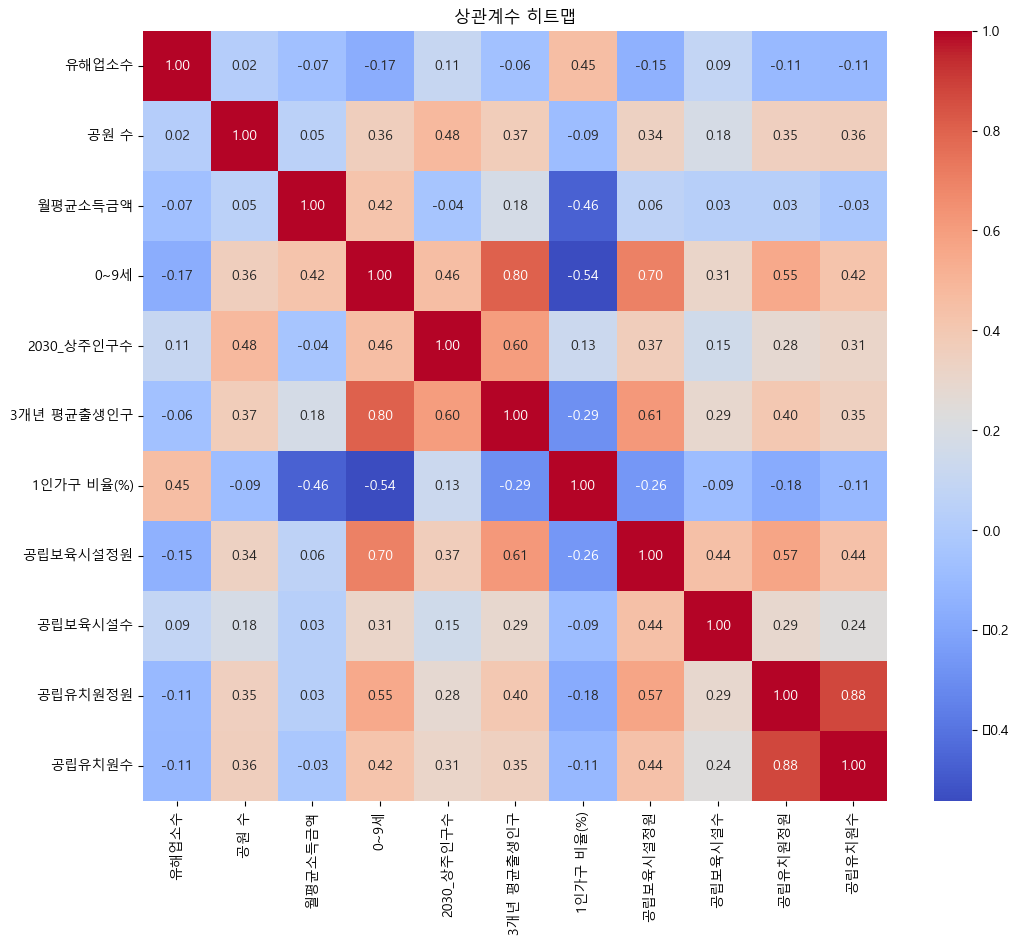

In [170]:
# 상관계수 확인
correlation_matrix = df_EDA.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

In [171]:
df_EDA

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립유치원수
0,종로구,사직동,23,6,5039456,462,2476,30.0,38.73,101,1.0,0.0,0
1,종로구,부암동,2,0,3661725,381,2586,24.7,29.92,127,2.0,0.0,0
2,종로구,평창동,6,3,4544046,996,4740,66.3,20.78,123,1.0,0.0,0
3,용산구,한남동,21,1,4397761,1027,6364,119.3,44.03,145,2.0,34.0,1
4,성동구,왕십리2동,42,2,3487691,1053,5333,115.0,32.85,336,6.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,종로구,교남동,3,1,4617088,741,2650,59.3,29.69,245,4.0,0.0,0
416,종로구,종로1·2·3·4가동,289,4,3261845,170,1751,15.0,65.21,97,2.0,0.0,0
417,서초구,방배2동,1,6,3869928,934,6287,101.0,28.31,298,5.0,0.0,0
418,강북구,미아동,7,5,2335731,565,6640,45.3,45.69,198,3.0,0.0,0


## 출생율인구가 높은 지역의 특징 찾기

In [172]:
df_EDA.sort_values(by = '3개년 평균출생인구', ascending=False).head(10)

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립유치원수
119,송파구,위례동,0,4,3893769,6382,7293,321.3,11.47,1532,16.0,538.0,5
162,금천구,독산1동,35,8,3019139,2915,13828,320.7,45.62,722,16.0,105.0,2
294,강서구,염창동,8,4,4149403,3436,12119,315.7,20.38,381,8.0,62.0,1
63,노원구,상계8동,0,5,3184253,1901,7437,297.0,22.36,263,8.0,80.0,2
393,송파구,가락1동,36,0,4845454,3003,5781,271.3,13.16,675,9.0,60.0,1
74,구로구,신도림동,5,3,4406430,2984,10299,269.7,18.26,294,8.0,59.0,1
304,강서구,화곡1동,108,11,2504960,1994,18770,263.3,41.90,275,4.0,102.0,2
87,영등포구,당산2동,7,2,4157253,2376,14236,263.0,44.55,483,9.0,41.0,1
98,영등포구,문래동,11,1,4056842,2846,9293,261.7,24.20,333,11.0,28.0,1
65,양천구,신정3동,28,11,3179649,3132,11857,252.0,21.35,756,21.0,256.0,4


출생인구가 많은 행정동일수록 1인가구 비울이 적고(당연하고)  
어린이집 수가 대부분 30개 이상    

In [173]:
df_GJ = df_EDA[df_EDA['자치구'] == '광진구'].sort_values(by = '3개년 평균출생인구', ascending=False)
df_GJ

,자치구,행정동,유해업소수,공원 수,월평균소득금액,0~9세,2030_상주인구수,3개년 평균출생인구,1인가구 비율(%),공립보육시설정원,공립보육시설수,공립유치원정원,공립유치원수
37,광진구,자양3동,5,2,4391943,1958,8290,166.3,21.22,239,3.0,46.0,1
175,광진구,구의3동,5,6,4041811,1574,9293,152.7,27.99,277,6.0,0.0,0
179,광진구,자양2동,1,3,3018829,1209,7805,112.3,30.48,196,4.0,76.0,2
177,광진구,광장동,9,2,5314464,2415,8160,112.0,13.46,242,6.0,58.0,1
38,광진구,구의2동,2,2,2928061,1308,7401,106.7,29.16,152,3.0,0.0,0
172,광진구,중곡4동,0,2,2542721,1015,8900,104.3,31.41,171,3.0,30.0,1
174,광진구,구의1동,8,1,2706661,859,8632,86.0,50.82,175,2.0,0.0,0
169,광진구,중곡2동,9,1,2576212,830,7524,82.3,39.31,208,4.0,0.0,0
171,광진구,중곡3동,7,1,2409648,605,5373,74.0,41.61,234,3.0,52.0,1
165,광진구,군자동,11,2,2626714,645,7647,73.0,54.19,241,4.0,0.0,0


In [174]:
pir = pd.read_csv('data/우선순위추가.csv')
pir

,월평균소득금액,1인가구 비율(%),3개년 평균출생인구,cluster,행정동
0,4391943,21.22,166.3,3순위,자양3동
1,2928061,29.16,106.7,1순위,구의2동
2,2490675,76.43,44.7,4순위,화양동
3,2626714,54.19,73.0,2순위,군자동
4,2558983,44.68,71.3,2순위,중곡1동
5,2576212,39.31,82.3,2순위,중곡2동
6,2409648,41.61,74.0,2순위,중곡3동
7,2542721,31.41,104.3,1순위,중곡4동
8,2870468,53.79,53.0,2순위,능동
9,2706661,50.82,86.0,2순위,구의1동


In [175]:
df_GJ = pd.merge(df_GJ, pir[['행정동', 'cluster']], on = '행정동')

In [176]:
df_GJ[['행정동', '월평균소득금액', '3개년 평균출생인구', '1인가구 비율(%)', '공립보육시설수', '공립유치원수', 'cluster']].sort_values('cluster')

,행정동,월평균소득금액,3개년 평균출생인구,1인가구 비율(%),공립보육시설수,공립유치원수,cluster
2,자양2동,3018829,112.3,30.48,4.0,2,1순위
4,구의2동,2928061,106.7,29.16,3.0,0,1순위
5,중곡4동,2542721,104.3,31.41,3.0,1,1순위
6,구의1동,2706661,86.0,50.82,2.0,0,2순위
7,중곡2동,2576212,82.3,39.31,4.0,0,2순위
8,중곡3동,2409648,74.0,41.61,3.0,1,2순위
9,군자동,2626714,73.0,54.19,4.0,0,2순위
10,자양1동,2756172,72.3,43.98,3.0,1,2순위
11,중곡1동,2558983,71.3,44.68,2.0,0,2순위
12,자양4동,2800761,71.0,45.06,4.0,0,2순위


## 공립, 사립 어린이집 위경도

In [36]:
data_knd = pd.read_csv('data/raw_data/가중치선정/서울시 어린이집 정보(표준 데이터, 행정동).csv')
data_knd.head()

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일,ADM_NM
0,종로구,11110000180,로카키즈어린이집,직장,정상,3184,서울특별시 종로구 새문안로2길 10 1층,02-739-8042,NaN,NaN,...,0.0,거짓,0.0,0.0,0.0,1.0,0.0,6.0,2022/10/26 22:01:35,사직동
1,종로구,11110000166,푸르지오어린이집,직장,폐지,3182,서울특별시 종로구 신문로1가 새문안로 75,02-2288-2761,02-2288-2761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/10/26 22:01:35,사직동
2,종로구,11110000162,아이누리 어린이집,직장,정상,3174,서울특별시 종로구 사직로8길 20 파크팰리스 제1층 제101호,02-6959-7695,02-6959-7696,NaN,...,0.0,거짓,0.0,0.0,0.0,2.0,0.0,13.0,2022/10/26 22:01:35,사직동
3,종로구,11110000158,현대해상 온마음어린이집,직장,정상,3176,서울특별시 종로구 신문로2가 경희궁1길 9,02-725-5355,02-725-5356,NaN,...,0.0,거짓,0.0,0.0,0.0,2.0,0.0,16.0,2022/10/26 22:01:35,사직동
4,종로구,11110000157,LG광화문어린이집,직장,정상,3184,서울특별시 종로구 신문로2가 새문안로 58,070-4065-0286,070-4065-0287,NaN,...,0.0,거짓,0.0,0.0,0.0,1.0,0.0,11.0,2022/10/26 22:01:35,사직동


In [38]:
data_knd.columns

Index(['시군구명', '어린이집코드', '어린이집명', '어린이집유형', '운영현황', '우편번호', '상세주소', '전화번호',
       '팩스번호', '홈페이지주소', '보육실수', '보육실 면적', '놀이터수', 'CCTV총설치수', '보육교직원수', '정원',
       '현원', '시설 위도(좌표값)', '시설 경도(좌표값)', '통학차량운영여부', '인가일자', '휴지시작일자',
       '휴지종료일자', '폐지일자', '데이터기준일자', '제공서비스', '반수-만0세', '반수-만1세', '반수-만2세',
       '반수-만3세', '반수-만4세', '반수-만5세', '반수-영아혼합(만0~2세)', '반수-유아혼합(만3~5세)',
       '반수-특수장애', '반수-총계', '아동수-만0세', '아동수-만1세', '아동수-만2세', '아동수-만3세',
       '아동수-만4세', '아동수-만5세', '아동수-영아혼합(만0~2세)', '아동수-유아혼합(만3~5세)', '아동수-특수장애',
       '아동수-총계', '근속년수-1년미만', '근속년수-1년이상~2년미만', '근속년수-2년이상~4년미만',
       '근속년수-4년이상~6년미만', '근속년수-6년이상', '교직원현황-원장', '교직원현황-보육교사', '교직원현황-특수교사',
       '교직원현황-치료교사', '교직원현황-영양사', '교직원현황-간호사', '교직원현황-간호조무사', '교직원현황-조리원',
       '교직원현황-사무직원', '교직원현황-총계', '데이터수집일', 'ADM_NM'],
      dtype='object')

In [41]:
data_knd2 = data_knd[['어린이집명', '어린이집유형', '운영현황','시설 위도(좌표값)', '시설 경도(좌표값)']]
data_knd2.head()

,어린이집명,어린이집유형,운영현황,시설 위도(좌표값),시설 경도(좌표값)
0,로카키즈어린이집,직장,정상,37.568704,126.971979
1,푸르지오어린이집,직장,폐지,37.570600,126.972949
2,아이누리 어린이집,직장,정상,37.573931,126.970590
3,현대해상 온마음어린이집,직장,정상,37.571131,126.971008
4,LG광화문어린이집,직장,정상,37.569275,126.971579


In [42]:
data_knd2 = data_knd2[data_knd2['운영현황'] != '폐지']
data_knd2 = data_knd2[data_knd2['운영현황'] != '휴지']
data_knd2 = data_knd2[data_knd2['운영현황'].notna()]
data_knd2

,어린이집명,어린이집유형,운영현황,시설 위도(좌표값),시설 경도(좌표값)
0,로카키즈어린이집,직장,정상,37.568704,126.971979
2,아이누리 어린이집,직장,정상,37.573931,126.970590
3,현대해상 온마음어린이집,직장,정상,37.571131,126.971008
4,LG광화문어린이집,직장,정상,37.569275,126.971579
5,KIM&CHANG 어린이집,직장,정상,37.572274,126.970990
...,...,...,...,...,...
9201,꿈자람공동육아방 배봉산점,국공립,정상,127.062735,37.578443
9203,꿈자람공동육아방 장안1호점,국공립,정상,127.068589,37.572344
9204,꿈자람공동육아방 용신점,국공립,정상,127.029898,37.572272
9205,꿈자람공동육아방 장안2호점,국공립,정상,127.067546,37.573657


In [47]:
data_knd_prv = data_knd2[data_knd2['어린이집유형'] != '국공립'].reset_index(drop = True)
data_knd_prv = data_knd_prv.drop(columns='운영현황')

In [48]:
data_knd_prv

,어린이집명,어린이집유형,시설 위도(좌표값),시설 경도(좌표값)
0,로카키즈어린이집,직장,37.568704,126.971979
1,아이누리 어린이집,직장,37.573931,126.970590
2,현대해상 온마음어린이집,직장,37.571131,126.971008
3,LG광화문어린이집,직장,37.569275,126.971579
4,KIM&CHANG 어린이집,직장,37.572274,126.970990
...,...,...,...,...
2894,한올어린이집,민간,37.627856,127.022278
2895,도토리집공동육아어린이집,협동,37.638241,127.008203
2896,꽃길어린이집,민간,37.637310,127.014127
2897,즐거운숲어린이집,가정,37.640241,127.010806


In [50]:
data_knd_nat = data_knd2[data_knd2['어린이집유형'] == '국공립'].reset_index(drop = True)
data_knd_nat = data_knd_nat.drop(columns='운영현황')
data_knd_nat

,어린이집명,어린이집유형,시설 위도(좌표값),시설 경도(좌표값)
0,사직어린이집,국공립,37.578099,126.968686
1,삼청어린이집,국공립,37.584006,126.980487
2,엔젤키즈어린이집,국공립,37.598540,126.960502
3,부암어린이집,국공립,37.601522,126.963073
4,종로생명숲어린이집,국공립,37.606467,126.968177
...,...,...,...,...
1919,꿈자람공동육아방 배봉산점,국공립,127.062735,37.578443
1920,꿈자람공동육아방 장안1호점,국공립,127.068589,37.572344
1921,꿈자람공동육아방 용신점,국공립,127.029898,37.572272
1922,꿈자람공동육아방 장안2호점,국공립,127.067546,37.573657


In [52]:
# data_knd_prv.to_csv('사립어린이집.csv', index=False, encoding='utf-8')
# data_knd_nat.to_csv('국공립어린이집.csv', index=False, encoding='utf-8')